In [58]:
from importlib import reload
# Tips to me:
# Use Python 3.11.6
# That's in the location /opt/homebrew/bin/python3

# Libraries
import torch
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
import dataset
from IPython.display import Audio
from Nets import complicatedNet
from torch.nn import functional as F
import models

In [14]:
reload(dataset)
allset = dataset.AudioDatasetAt("datasets/clips-test")


In [20]:
# Getting a random data
wf = allset.get_random()
inp = wf.unsqueeze(0)
print(inp.shape)
Audio(wf, rate=32000)

Getting 37th from the 536 datasets.
torch.Size([1, 1, 187776])


In [16]:
# Run following two cells in order to check if dataloaders work properly

reload(dataset)
# Check Loaders
from torch.utils.data import DataLoader
loader = DataLoader(allset, 64, True, collate_fn=dataset.my_collater)

In [17]:
# return
i = 0
for d in loader:
    i += 1
    if i > 10:
        break
    print(d.shape)

torch.Size([152, 1, 96000])
torch.Size([150, 1, 96000])
torch.Size([158, 1, 96000])
torch.Size([150, 1, 96000])
torch.Size([195, 1, 96000])
torch.Size([163, 1, 96000])
torch.Size([155, 1, 96000])
torch.Size([160, 1, 96000])
torch.Size([50, 1, 96000])


In [39]:
# Instantiating Encoder, Quantizer and Decoder
reload(complicatedNet)
encoder = complicatedNet.Encoder(4)
quantizer = torch.nn.Identity()
decoder = complicatedNet.Decoder(4)
model = models.allNet(encoder=encoder, quantizer=quantizer, decoder=decoder)
wf = allset.get_random()
inp = wf.unsqueeze(0)
x = inp
print(x.shape)
x = encoder(x)
x = quantizer(x)
x = decoder(x)
out = x
print(x.shape)

/opt/homebrew/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Getting 425th from the 536 datasets.
torch.Size([1, 1, 201600])
torch.Size([1, 1, 201600])


In [22]:
# Instantiating another model
reload(complicatedNet)
encoder = complicatedNet.Encoder(4)
quantizer = torch.nn.Identity()
decoder = complicatedNet.Decoder(4)
my_model = models.allNet(
    encoder=encoder, quantizer=quantizer, decoder=decoder
)
device = 'mps'
my_model.to(device)

x = wf.unsqueeze(0).to(device)
output = my_model(
    x
    ).cpu().detach().numpy()

Audio(output[0], rate=32000)



In [24]:
idx = 0
size = 13
remaining = lambda : size - idx

In [31]:
idx += 2
remaining()

3

In [59]:
spectrogramer1 = torchaudio.transforms.MelSpectrogram(32000)
spectrogramer2 = torchaudio.transforms.MelSpectrogram(32000)

/opt/homebrew/lib/python3.11/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [82]:
image1 = spectrogramer1(inp).cpu().detach()
image2 = spectrogramer1(out).cpu().detach()
image1 = F.interpolate(image1, scale_factor=.1, mode='bilinear').squeeze()
image2 = F.interpolate(image2, scale_factor=.1, mode='bilinear').squeeze()
# image1 = F.interpolate(image1, mode='linear', scale_factor=10).squeeze()
image1.shape, image2.shape

(torch.Size([12, 100]), torch.Size([12, 100]))

<Figure size 2000x700 with 0 Axes>

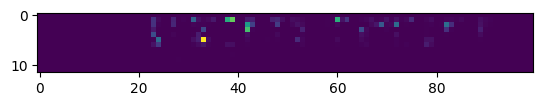

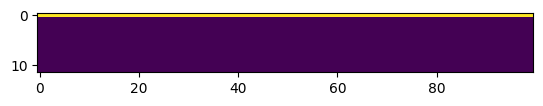

In [83]:
plt.figure(figsize=(20,7))
plt.figure(211)
plt.imshow(image1)
plt.figure(212)
plt.imshow(image2)